<a href="https://colab.research.google.com/github/KSU-MSBA/64060/blob/master/Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 - Supervised Learning Modules

> Adapted from Chapter 2: Overview of the Data Mining Process
> 
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages
We use the pandas, the Python data anlysis library, for handling data. The API of this library is very similar to R data frames. See https://pandas.pydata.org/ for details.

In [ ]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import os

import matplotlib.pylab as plt

Note that we import some of the packages using an alias notation, to make the code more readable.
```
import <package> as <alias>
```
The aliases `np`, `pd`, and `plt` are commonly used in the data science community.

The following statement uploads the data file into google colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WestRoxbury.csv to WestRoxbury.csv


## Table 2.3 
Load the West Roxbury data set

In [ ]:
housing_df = pd.read_csv('WestRoxbury.csv')
type(housing_df)

pandas.core.frame.DataFrame

Determine the shape of the data frame. It has 5802 rows and 14 columns

In [ ]:
housing_df.shape

(5802, 14)

In [ ]:
# Class of each column in the dataframe
housing_df.dtypes

TOTAL VALUE     float64
TAX               int64
LOT SQFT          int64
YR BUILT          int64
GROSS AREA        int64
LIVING AREA       int64
FLOORS          float64
ROOMS             int64
BEDROOMS          int64
FULL BATH         int64
HALF BATH         int64
KITCHEN           int64
FIREPLACE         int64
REMODEL          object
dtype: object

Show the top rows of the dataframe

In [ ]:
housing_df.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None


## Cleanup
Preprocessing and cleaning up data is an important aspect of data analysis. 

Show the column names.

In [ ]:
housing_df.columns

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

Note that some column titles end with spaces and some consist of two space separated words. For further analysis it's more convenient to have column names which are single words. 

In the rename command you can specify individual columns by name and provide their new name using a dictionary. Note that we use the `inplace` argument here. This means that the data frame is modified directly. By default, the modification is done on a copy and the copy returned by the method.

In [ ]:
housing_df = housing_df.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'})
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

We therefore strip trailing spaces and replace the remaining spaces with an underscore _. Instead of using the `rename` method, we create a modified copy of `columns` and assign to the `columns` field of the dataframe.

In [ ]:
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

Are there any missing values in any of the columns?

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TOTAL_VALUE  5802 non-null   float64
 1   TAX          5802 non-null   int64  
 2   LOT_SQFT     5802 non-null   int64  
 3   YR_BUILT     5802 non-null   int64  
 4   GROSS_AREA   5802 non-null   int64  
 5   LIVING_AREA  5802 non-null   int64  
 6   FLOORS       5802 non-null   float64
 7   ROOMS        5802 non-null   int64  
 8   BEDROOMS     5802 non-null   int64  
 9   FULL_BATH    5802 non-null   int64  
 10  HALF_BATH    5802 non-null   int64  
 11  KITCHEN      5802 non-null   int64  
 12  FIREPLACE    5802 non-null   int64  
 13  REMODEL      5802 non-null   object 
dtypes: float64(2), int64(11), object(1)
memory usage: 634.7+ KB


## Accessing subsets of the data
Pandas uses two methods to access rows in a data frame; `loc` and `iloc`. The `loc` method is more general and allows accessing rows using labels. The `iloc` method on the other hand only allows using integer numbers. To specify a range of rows use the slice notation, e.g. `0:9`.

<div class='alert alert-info'>Note that in contrast to R, Python uses 0-indexing, which means that indices start at 0 and not at 1.</div>

To show the first four rows of the data frame, you can use the following commands.

In [ ]:
housing_df.loc[0:3]  # for loc, the second index in the slice is inclusive

NameError: ignored

In [ ]:
housing_df.iloc[0:4]  # for loc, the second index in the slice is exclusive

NameError: ignored

Note the difference in the two methods with respect to the slice notation! For consistency with how slices are defined in Python, we will use the `iloc` method mostly from here on.

Next, show the first ten rows of the first column

In [ ]:
housing_df['TOTAL_VALUE'].iloc[0:10]
housing_df.iloc[0:10]['TOTAL_VALUE']  # the order is not important
housing_df.iloc[0:10].TOTAL_VALUE

Show the fifth row of the first 10 columns. The `iloc` methods allows specifying the rows and columns within one set of brackets. `dataframe.iloc[rows, columns]`

In [ ]:
housing_df.iloc[4][0:10]
housing_df.iloc[4, 0:10]  # this is equivalent

If you prefer to preserve the data frame format, use a slice for the rows as well.

In [ ]:
housing_df.iloc[4:5, 0:10]

Use the `pd.concat` method if you want to combine non-consecutive columns into a new data frame. The `axis` argument specifies the dimension along which the concatenation happens, 0=rows, 1=columns.

In [ ]:
pd.concat([housing_df.iloc[4:6,0:2], housing_df.iloc[4:6,4:6]], axis=1)

In [ ]:
pd.concat([housing_df.iloc[4:6,0:2], housing_df.iloc[10:12,0:2]], axis=0)

To specify a full column, use the `:` on its own.
```
housing.iloc[:,0:1]
```
A often more practical way is to use the column name as follows

In [ ]:
housing_df['TOTAL_VALUE']

We can subset the column using a slice

In [ ]:
housing_df['TOTAL_VALUE'][0:10]

Pandas provides a number of ways to access statistics of the columns.

In [ ]:
print('Number of rows ', len(housing_df['TOTAL_VALUE']))
print('Mean of TOTAL_VALUE ', housing_df['TOTAL_VALUE'].mean())

A data frame also has the method `describe` that prints a number of common statistics 

In [ ]:
housing_df['TOTAL_VALUE'].describe()

In [ ]:
housing_df.describe()

## Table 2.4
Use the `sample` method to retrieve a random sample of observations. Here we sample 5 observations without replacement.

In [ ]:
housing_df.sample(5)

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
2896,336.7,4235,3700,1950,2304,1120,1.0,6,3,1,1,1,0,None
5049,456.6,5744,7040,1950,2970,1708,2.0,7,3,1,2,1,1,None
2759,474.0,5962,8192,1900,4616,2443,2.0,9,4,1,1,1,1,None
488,327.9,4124,10759,1967,2756,1469,1.5,6,2,1,1,1,0,None
1725,405.7,5103,8250,1950,2808,1536,2.0,7,3,1,1,1,1,None


The sample method allows to specify weights for the individual rows. We use this here to oversample houses with over 10 rooms.

In [ ]:
weights = [0.9 if rooms > 10 else 0.01 for rooms in housing_df.ROOMS]
housing_df.sample(5, weights=weights)

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
5656,555.8,6991,7235,1949,4221,2484,1.0,13,4,2,1,2,1,Recent
3564,453.6,5706,5000,1910,5401,2951,2.0,13,4,2,0,1,0,None
2797,576.2,7248,8233,1900,6109,3802,2.5,10,6,2,0,1,1,None
4500,490.1,6165,9000,1939,4123,2285,2.0,11,4,1,1,1,1,Old
1850,505.6,6360,7205,1954,4996,2375,1.5,11,6,3,0,2,0,None


## Table 2.5

In [ ]:
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

The REMODEL column is a factor, so we need to change it's type.

In [ ]:
print(housing_df.REMODEL.dtype)
housing_df.REMODEL = housing_df.REMODEL.astype('category')
print(housing_df.REMODEL.cat.categories)  # It can take one of three levels
print(housing_df.REMODEL.dtype)  # Type is now 'category'

object
Index(['None', 'Old', 'Recent'], dtype='object')
category


Other columns also have types.

In [ ]:
print(housing_df.BEDROOMS.dtype)  # BEDROOMS is an integer variable
print(housing_df.TOTAL_VALUE.dtype)  # Total_Value is a numeric variable

int64
float64


It's also possible to the all columns data types 

In [ ]:
housing_df.dtypes

TOTAL_VALUE     float64
TAX               int64
LOT_SQFT          int64
YR_BUILT          int64
GROSS_AREA        int64
LIVING_AREA       int64
FLOORS          float64
ROOMS             int64
BEDROOMS          int64
FULL_BATH         int64
HALF_BATH         int64
KITCHEN           int64
FIREPLACE         int64
REMODEL        category
dtype: object

## Table 2.6
Pandas provides a method to convert factors into dummy variables.

In [ ]:
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL_Old', 'REMODEL_Recent'],
      dtype='object')

In [ ]:
print(housing_df.loc[:, 'REMODEL_Old':'REMODEL_Recent'].head(5))

   REMODEL_Old  REMODEL_Recent
0            0               0
1            0               1
2            0               0
3            0               0
4            0               0


## Table 2.7
To illustrate missing data procedures, we first convert a few entries for bedrooms to NA's. Then we impute these missing values using the median of the remaining values.

In [ ]:
print('Number of rows with valid BEDROOMS values before: ', 
      housing_df['BEDROOMS'].count()) 
missingRows = housing_df.sample(10).index
housing_df.loc[missingRows, 'BEDROOMS'] = np.nan
print('Number of rows with valid BEDROOMS values after setting to NAN: ', 
      housing_df['BEDROOMS'].count()) 
housing_df['BEDROOMS'].count()

Number of rows with valid BEDROOMS values before:  5802
Number of rows with valid BEDROOMS values after setting to NAN:  5792


5792

In [ ]:
# remove rows with missing values 
reduced_df = housing_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  5792


Replace the missing values using the median of the remaining values.

By default, the `median` method of a pandas dataframe ignores NA values. This is in contrast to R where this must be specified explicitly.

In [ ]:
medianBedrooms = housing_df['BEDROOMS'].median()
housing_df.BEDROOMS = housing_df.BEDROOMS.fillna(value=medianBedrooms)
print('Number of rows with valid BEDROOMS values after filling NA values: ',
      housing_df['BEDROOMS'].count())

Number of rows with valid BEDROOMS values after filling NA values:  5802


## Table 2.8 - Normalizing and Rescaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = housing_df.copy()

# Normalizing a data frame

# pandas:
norm_df = (housing_df - housing_df.mean()) / housing_df.std()

# scikit-learn: 
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(housing_df), 
                       index=housing_df.index, columns=housing_df.columns)
# the result of the transformation is a numpy array, we convert it into a dataframe

# Rescaling a data frame
# pandas:
rescaled_df = (housing_df - housing_df.min()) / (housing_df.max() - housing_df.min())

# scikit-learn:
scaler = MinMaxScaler()
rescaled_df = pd.DataFrame(scaler.fit_transform(housing_df), 
                       index=housing_df.index, columns=housing_df.columns)

The standardization of the dataset may give a <code>DataConversionWarning</code>. This informs you that the integer columns in the dataframe are automatically converted to real numbers (<code>float64</code>). This is expected and you can therefore ignore this warning. If you want to suppress the warning, you can explicitly convert the integer columns to real numbers</p>
<pre>
# Option 1: Identify all integer columns, remove personal loan, 
# and change their type
intColumns = [c for c in housing_df.columns if housing_df[c].dtype == 'int']
housing_df[intColumns] = housing_df[intColumns].astype('float64')
</pre>
Alternatively, you can suppress the warning as follows:
<pre>
# Option 2: use the warnings package to suppress the display of the warning
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    norm_df = pd.DataFrame(scaler.fit_transform(housing_df), 
                       index=housing_df.index, columns=housing_df.columns)    
</pre>

## Table 2.10
Split the dataset into training (60%) and validation (40%) sets. Randomly sample 60% of the dataset into a new data frame `trainData`. The remaining 40% serve as validation.

In [ ]:
# random_state is set to a defined value to get the same partitions when re-running the code
trainData= housing_df.sample(frac=0.6, random_state=1)
# assign rows that are not already in the training set, into validation 
validData = housing_df.drop(trainData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print()

# alternative way using scikit-learn
trainData, validData = train_test_split(housing_df, test_size=0.40, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)

Training   :  (3481, 15)
Validation :  (2321, 15)

Training   :  (3481, 15)
Validation :  (2321, 15)


Partition the dataset into training (50%), validation (30%), and test sets (20%). 

In [ ]:
# randomly sample 50% of the row IDs for training
trainData = housing_df.sample(frac=0.5, random_state=1)
# sample 30% of the row IDs into the validation set, drawing only from records
# not already in the training set; 60% of 50% is 30%
validData = housing_df.drop(trainData.index).sample(frac=0.6, random_state=1)  
# the remaining 20% rows serve as test
testData = housing_df.drop(trainData.index).drop(validData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)
print()

# alternative way using scikit-learn
trainData, temp = train_test_split(housing_df, test_size=0.5, random_state=1)
validData, testData = train_test_split(temp, test_size=0.4, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)

trainToOriginal = round(trainData.shape[0]/(housing_df.shape[0]), 2) * 100
valToOriginal = round(validData.shape[0]/(housing_df.shape[0]), 2) * 100
testToOriginal = round(testData.shape[0]/(housing_df.shape[0]), 2) * 100

print ('Ratio to original data: Train {}%, Val {}%, and Test {}% '.format(trainToOriginal,valToOriginal,testToOriginal))


Training   :  (2901, 15)
Validation :  (1741, 15)
Test       :  (1160, 15)

Training   :  (2901, 15)
Validation :  (1740, 15)
Test       :  (1161, 15)
Ratio to original data: Train 50.0%, Val30.0%, and Test 20.0% 


## Section 2.6 - Building a Predictive Model
The statsmodels package allows to define linear regression models using a formula definition similar to R. In contrast to R, all variables need to be specified explicitly. We construct a formula excluding the dependent variable and the `TAX` column

In [ ]:
# Data loading and preprocessing
housing_df = pd.read_csv('WestRoxbury.csv')
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)

excludeColumns = ('TOTAL_VALUE', 'TAX')
predictors = [s for s in housing_df.columns if s not in excludeColumns]
outcome = 'TOTAL_VALUE'

# partition data
X = housing_df[predictors]
y = housing_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

model = LinearRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
train_results = pd.DataFrame({
    'TOTAL_VALUE': train_y, 
    'predicted': train_pred, 
    'residual': train_y - train_pred
})
print(train_results.head())

NameError: ignored

In [ ]:
plt.plot(train_results.TOTAL_VALUE, train_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

NameError: ignored

Predict the validation data

In [ ]:
valid_pred = model.predict(valid_X)
valid_results = pd.DataFrame({
    'TOTAL_VALUE': valid_y, 
    'predicted': valid_pred, 
    'residual': valid_y - valid_pred
})
print(valid_results.head())

In [ ]:
plt.plot(valid_results.TOTAL_VALUE, valid_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

### Table 2.14
We can use the metrics that scikit-learn provides.

In [ ]:
print('Training set r2: ', r2_score(train_results.TOTAL_VALUE, train_results.predicted))
print('Validation set r2: ', r2_score(valid_results.TOTAL_VALUE, valid_results.predicted))

In [ ]:
# import the utility function regressionSummary
from dmba import regressionSummary

# training set
regressionSummary(train_results.TOTAL_VALUE, train_results.predicted)

# validation set
regressionSummary(valid_results.TOTAL_VALUE, valid_results.predicted)

### Table 2.15

In [ ]:
new_data = pd.DataFrame({
    'LOT_SQFT': [4200, 6444, 5035],
    'YR_BUILT': [1960, 1940, 1925],
    'GROSS_AREA': [2670, 2886, 3264],
    'LIVING_AREA': [1710, 1474, 1523],
    'FLOORS': [2.0, 1.5, 1.9],
    'ROOMS': [10, 6, 6],
    'BEDROOMS': [4, 3, 2],
    'FULL_BATH': [1, 1, 1],
    'HALF_BATH': [1, 1, 0],
    'KITCHEN': [1, 1, 1],
    'FIREPLACE': [1, 1, 0],
    'REMODEL_Old': [0, 0, 0],
    'REMODEL_Recent': [0, 0, 1],
})
print(new_data)

print('Predictions: ', model.predict(new_data))

## Figure 2.2 and 2.3

In [ ]:
df = pd.DataFrame({'Expenditure': [239, 364,602, 644, 770, 789, 911], 
                   'Revenue': [514, 789, 550, 1386, 1394, 1440, 1354]})
df

,Expenditure,Revenue
0,239,514
1,364,789
2,602,550
3,644,1386
4,770,1394
5,789,1440
6,911,1354


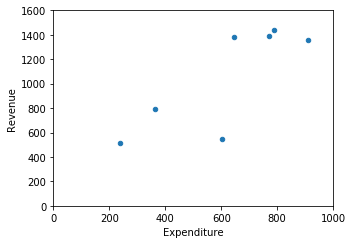

In [ ]:
df.plot.scatter(x='Expenditure', y='Revenue', xlim=(0, 1000), ylim=(0, 1600), figsize=(5, 3.5))
plt.tight_layout()  # Increase the separation between the plots
plt.show()

In [ ]:
x = list(df.Expenditure)
y = list(df.Revenue)

from scipy import interpolate
f = interpolate.PchipInterpolator(x, y)

x_new = np.linspace(x[0], x[-1], 100)
y_new = [f(xi) for xi in x_new]

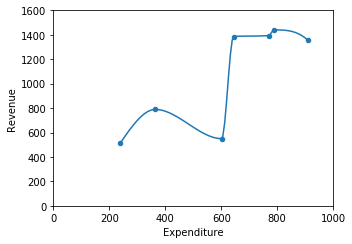

In [ ]:
df.plot.scatter(x='Expenditure', y='Revenue', xlim=(0, 1000), ylim=(0, 1600), figsize=(5, 3.5))
plt.plot(x_new, y_new)
plt.tight_layout()  # Increase the separation between the plots
plt.show()